# 03_Python_기초정리.ipynb

##  to_csv 에러 없애는 방법 : errors

In [3]:
df.to_csv('test.csv', encoding='cp949', errors='replace')   # 'replace', 'ignore'

## DataFrame 행 추가

In [ ]:
new_data = {'성별코드': '3', '연령대코드(5세단위)' : 10, '허리둘레':100, '흡연상태': 1}
df.append(new_data, ignore_index=True)

## statsmodels 패키지 사용법

### Dummy화 쉽게 하는 법

In [44]:
import statsmodels.api as sm
import pandas
from patsy import dmatrices

df = sm.datasets.get_rdataset("Guerry", "HistData").data
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']
df = df[vars]
df = df.dropna()
df.head()

,Department,Lottery,Literacy,Wealth,Region
0,Ain,41,37,73,E
1,Aisne,38,51,22,N
2,Allier,66,13,61,C
3,Basses-Alpes,80,46,76,E
4,Hautes-Alpes,79,69,83,E


In [45]:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')

In [48]:
X.head()   ## 범주형 변수(Region)에서 NaN 값은 drop해주고, class 중 하나(여기서는 C)를 drop하고 나머지는 더미화

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0
3,1.0,1.0,0.0,0.0,0.0,46.0,76.0
4,1.0,1.0,0.0,0.0,0.0,69.0,83.0


### Fit & Summary
- 1단계: 알고리즘 선택
- 2단계: Fit
- 3단계: Summarize

In [49]:
# OLS(최소자승법) 회귀분석을 예시로 함

mod = sm.OLS(y, X) # 알고리즘 선택
res = mod.fit() # Fit
print(res.summary()) # Summarize model

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           1.07e-05
Time:                        22:00:34   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [50]:
# 변수별 계수 추출
res.params

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

In [51]:
# r-squared 
res.rsquared

0.3379508691928822

In [52]:
# 사용 가능한 attriibutes 확인
dir(res)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',

### Diagnostics and specification tests

In [57]:
sm.stats.linear_rainbow(res)

(0.847233997615691, 0.6997965543621644)

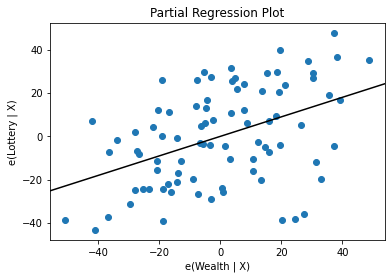

In [56]:
%matplotlib inline
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'], data=df.dropna(), obs_labels=False)
plt.show()

In [ ]:
import statsmodels.api as sm

data = sm.datasets.scotland.load(as_pandas=False)
data.exog = sm.add_constant(data.exog)

In [63]:
# y 값 형태
data.endog

array([60.3, 52.3, 53.4, 57. , 68.7, 48.8, 65.5, 70.5, 59.1, 62.7, 51.6,
       62. , 68.4, 69.2, 64.7, 75. , 62.1, 67.2, 67.7, 52.7, 65.7, 72.2,
       47.4, 51.3, 63.6, 50.7, 51.6, 56.2, 67.6, 58.9, 74.7, 67.3])

In [64]:
# X 값 형태
data.exog

array([[1.00000e+00, 7.12000e+02, 2.10000e+01, 1.05000e+02, 8.24000e+01,
        1.35660e+04, 1.23000e+01, 1.49520e+04],
       [1.00000e+00, 6.43000e+02, 2.65000e+01, 9.70000e+01, 8.02000e+01,
        1.35660e+04, 1.53000e+01, 1.70395e+04],
       [1.00000e+00, 6.79000e+02, 2.83000e+01, 1.13000e+02, 8.63000e+01,
        9.61100e+03, 1.39000e+01, 1.92157e+04],
       [1.00000e+00, 8.01000e+02, 2.71000e+01, 1.09000e+02, 8.04000e+01,
        9.48300e+03, 1.36000e+01, 2.17071e+04],
       [1.00000e+00, 7.53000e+02, 2.20000e+01, 1.15000e+02, 6.47000e+01,
        9.26500e+03, 1.46000e+01, 1.65660e+04],
       [1.00000e+00, 7.14000e+02, 2.43000e+01, 1.07000e+02, 7.90000e+01,
        9.55500e+03, 1.38000e+01, 1.73502e+04],
       [1.00000e+00, 9.20000e+02, 2.12000e+01, 1.18000e+02, 7.22000e+01,
        9.61100e+03, 1.33000e+01, 1.95040e+04],
       [1.00000e+00, 7.79000e+02, 2.05000e+01, 1.14000e+02, 7.52000e+01,
        9.48300e+03, 1.45000e+01, 1.59695e+04],
       [1.00000e+00, 7.71000e+02

In [67]:
# linear Regression
OLS(endog[, exog, missing, hasconst]) # Ordinary Least Squares
GLS(endog, exog[, sigma, missing, hasconst]) # Generalized Least Squares

# Logistic Regression
gamma_model = sm.GLM(data.endog, data.exog, family=sm.families.Gamma())
gamma_results = gamma_model.fit()
print(gamma_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     18.21
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           3.54e-08
Time:                        22:13:57   Log-Likelihood:                -81.844
No. Observations:                  32   AIC:                             179.7
Df Residuals:                      24   BIC:                             191.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.4141     40.922      3.358      0.0

# 06_통계분석_1

## 범주형 변수 빈도분석

In [ ]:
# 범주형 변수 빈도분석

da_cat = pd.DataFrame()
for i in  col_cat:
    a = df[i].value_counts(dropna =False).to_frame().sort_index().rename(columns={i:'count'}).reset_index()
    a['col_nm'] = i
    a = a.rename(columns = {'index':'class'})
    a = a[['col_nm','class','count']]
    b = df[i].value_counts(dropna =False, normalize = True).to_frame().sort_index().rename(columns={i:'ratio'}).reset_index()
    b = b['ratio'].to_frame()
    a = pd.concat([a,b],axis=1)
    da_cat = pd.concat([da_cat,a], axis = 0)
da_cat = da_cat.reset_index(drop=True)
da_cat

## 교호작용 확인
- 한 변수에 의해 다른 변수의 효과가 변하는 것을 말합니다.

## 다중공선성 제거
- 다중공선성은 예측변수 사이에 높은 상관관계가 있을 때 발생하며, 회귀계수 추정치의 신뢰성과 안정성에 문제를 발생시킨다. 
- 다중공선성을 진단하는데 널리 사용되는 분산팽창계수(variance inflation factor, VIF)
- VIF가 1.8이라는 것은 특정 회귀계수의 분산(표준오차의 제곱)이 만약 해당 예측변수가 나머지 예측변수와 완전히 상관관계가 없다면 가졌을 분산보다 80% 크다는 의미이다. VIF는 하한선이 1이지만 상한선이 없다.
- VIF가 10이 넘어가면 다중공선성이 있다고 판단하여 제거한다(변수를 하나씩 선택 제거해가며 VIF 계속 확인)
- 분석상 논리적으로 필요하다고 판단되면 유지해본다

In [ ]:
import statsmodels.api as sm
import pandas
from patsy import dmatrices

y, X = dmatrices('y2 ~ season + holiday', data=df, return_type='dataframe')

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

## 회귀분석 - SVM
- LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,<br>
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,<br>
     random_state=42, tol=0.0001, verbose=0)

In [12]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m,1)
y = (4+3*X+np.random.randn(m,1)).ravel()

In [13]:
from sklearn.svm import LinearSVR

svm_reg =LinearSVR(epsilon=1.5, random_state=42) # svm_reg = 기본 모형
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42) # svm_reg1 = 마진이 큰 모형(epsilon=1.5)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42) # svm_reg2 = 마진이 작은 모형(epsilon=0.5)

svm_reg.fit(X,y)
svm_reg1.fit(X,y)
svm_reg2.fit(X,y)

LinearSVR(epsilon=0.5, random_state=42)

In [14]:
# 서포트 벡터 정하기
#svm_reg 모델을 받고, X로 예측한 값 = y_pred
#off_margin = 실제 y값과 예측값 사이의 오차를 절대값으로 표현하되, 해당 모형의 epsilon보다 크거나 같은 값
#np.argwhere는 행렬에서 True에 해당하는 값 위치를 반환합니다.
#따라서, 오차가 epsilon보다 큰 값들의 위치 반환하며 이 것들이 곧 서포트 벡터로 활용
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

In [15]:
#plot찍기
#np.linspace로 axes의 첫 번째 값과 두 번째 값 사이를 100개로 쪼갠 일정한 값 생성 후 100행 1열로 reshape
#위 값(x1s)으로 예측한 y = y_pred
#x, y를 plot하고, y_pred에서 epsilon을 빼고 더한 값도 plot
#아까 구했던 서포트 벡터(지지도 벡터)를 scatter 찍기
def plot_svm_regression(svm_reg, X, y, axes) :
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100,1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, 'k-', linewidth=2, label = r'y^')
    plt.plot(x1s, y_pred + svm_reg.epsilon, 'k--')
    plt.plot(x1s, y_pred - svm_reg.epsilon, 'k--')
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, 'bo')
    plt.xlabel(r'x1', fontsize=18)
    plt.legend(loc='upper left', fontsize=18)
    plt.axis(axes)

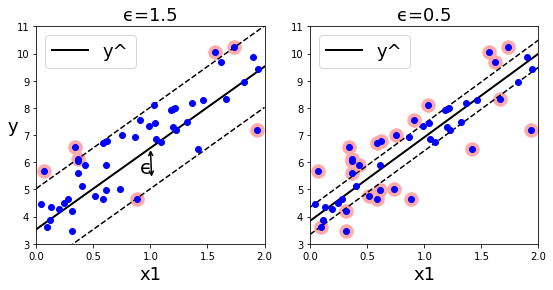

In [16]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0,2,3,11])
plt.title(r'ϵ={}'.format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r'y', fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred ,eps_y_pred - svm_reg1.epsilon], 'k-', linewidth=2)

#위에서 eps_x1 = 1 로 두고, 예측한 값 = eps_y_pred
#화살표와 함께 text를 넘기는 annotate
#따라서 도로의 폭을 나타냅니다. (epsilon)
#xy 는 주석을 달 위치입니다. ( eps_x1, eps_y_pred )
#xytext 는 xy위치에 넣을 text
#textcoords 는 지금 넣은 'data'가 default값이며, 주석을 달 객체의 좌표값 사용을 뜻합니다.
#arrowprops는 화살표설정

plt.annotate(
    ' ', xy = (eps_x1, eps_y_pred), xycoords='data', 
    xytext = (eps_x1, eps_y_pred-svm_reg1.epsilon),
    textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth' : 1.5}
    )

plt.text(0.91, 5.6, r'ϵ', fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0,2,3,11])
plt.title(r'ϵ={}'.format(svm_reg2.epsilon), fontsize=18)

plt.show()

## 회귀분석 - SVM - 비선형

In [9]:
np.random.seed(42)
m = 100
X = 2* np.random.rand(m,1) -1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m,1) / 10).ravel()

In [10]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly', gamma='auto', degree=2, C=10, epsilon=0.1)
svm_poly_reg.fit(X,y)

svm_poly_reg1 = SVR(kernel='poly', gamma='auto', degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel='poly', gamma='auto', degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(X,y)
svm_poly_reg2.fit(X,y)

SVR(C=0.01, degree=2, gamma='auto', kernel='poly')

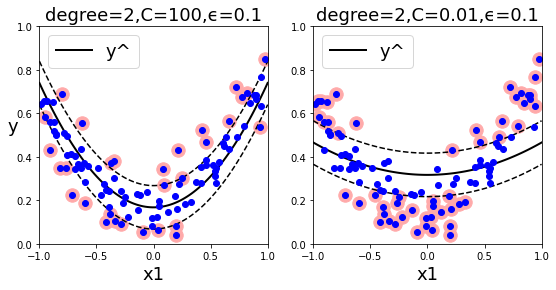

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,4))

plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r'degree={},C={},ϵ={}'.format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)

plt.ylabel(r'y', fontsize=18, rotation=0)

plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r'degree={},C={},ϵ={}'.format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)

plt.show()

# 06_통계분석_2

## 시계열 분석
- https://www.youtube.com/watch?v=rdR2fNDq6v0&ab_channel=%E2%80%8D%EA%B9%80%EC%84%B1%EB%B2%94%5B%EB%8B%A8%EC%9E%A5%2F4%EB%8B%A8%EA%B3%84BK21%EC%82%B0%EC%97%85%EA%B2%BD%EC%98%81%EA%B3%B5%ED%95%99%EA%B5%90%EC%9C%A1%EC%97%B0%EA%B5%AC%EB%8B%A8%5D


In [ ]:
# 정상성 확인 방법
# 그래프로 확인 방법(추세가 있거나, 계절성이 있거나, 분산이 변하면 안 됨)
# 평균과 분산이 시점에 관계없이 일정해야하고, 공분산도 시차에만 의존해야함

### 모듈 불러오기

In [2]:
import os

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima  ## ADP 볼 때는 없을 패키지

import seaborn as sns

%matplotlib inline

import itertools # 내장 패키지

### 데이터 불러오기

- 활용 데이터 : 공공 데이터(AirPassengers.csv)
- 1949~1960년 매달 비행기 탑승객 수에 대한 시계열 데이터
- 데이터 구조 : [144 x 1]

In [3]:
data = pd.read_csv('./data/AirPassengers.csv')
data = data.rename(columns = {'Month':'month', '#Passengers':'passengers'})
data['month'] = pd.to_datetime(data['month'])
data = data.set_index('month')   ### 시간 컬럼을 인덱스로 만들어줌
data.head()

,passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Box-Jenjins ARIMA Procedure
1) Data Preprocessing<br>
2) Identify Model to be Tentatively Entertainted<br>
3) Estimate Parameters<br>
4) Diagnosis Check<br>
5) Use Model to Forecast

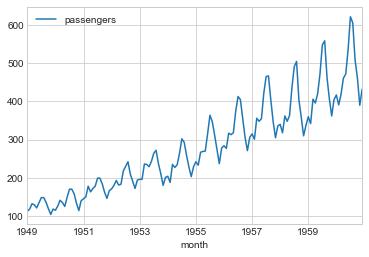

In [3]:
fig = data.plot()

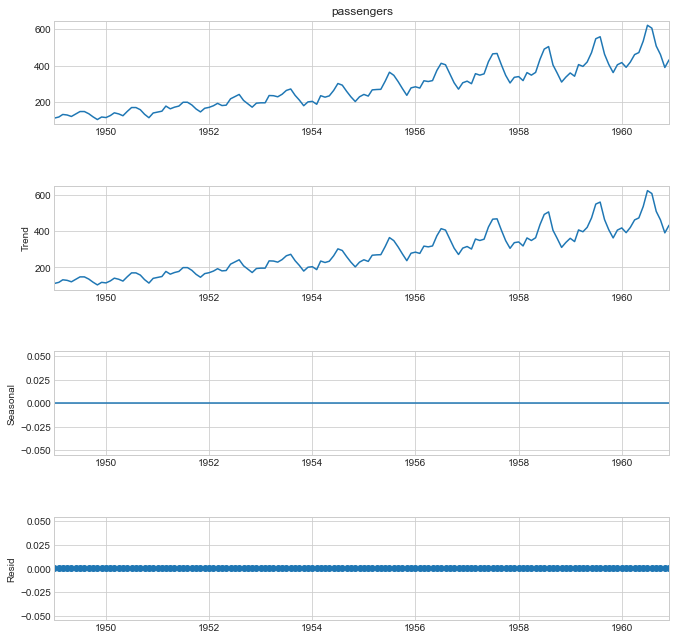

In [5]:
# Seasonal decomposition plot : Seasonal decomposition using moving averages.

# Observed : observed data
# Trend : The estimated trend component
# Seasonal : The estimated seasonal component
# resid : The estimated residuals
decomposition = sm.tsa.seasonal_decompose(data['passengers'], model = 'additive', period=1)
fig = decomposition.plot()
fig.set_size_inches(10,10)
plt.show()

### Identify Model to be Tentatively Entertainted

In [9]:
# Tr, Te = 8:2
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

In [10]:
# 참고 #
train_data.values.squeeze()

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491], dtype=int64)

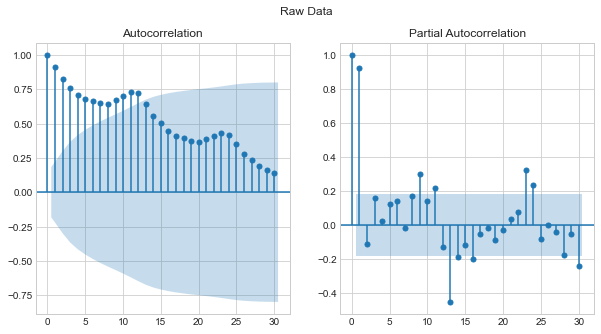

In [11]:
# ACF, PACF plot

fig, ax = plt.subplots(1,2, figsize = (10, 5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(train_data.values.squeeze(), lags = 30, ax = ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags = 30, ax = ax[1])
plt.show()
### ACF 그래프가 점진적으로 감소하는 것은 전형적인 Non-stationary 데이터이다 = 정상정이 없음

In [12]:
# Differencing

diff_train_data = train_data.copy()
diff_train_data = diff_train_data['passengers'].diff()
diff_train_data = diff_train_data.dropna()
print('##### Raw Data #####')
print(train_data)
print('### Differenced Data ###')
print(diff_train_data)

##### Raw Data #####
            passengers
month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1958-03-01         362
1958-04-01         348
1958-05-01         363
1958-06-01         435
1958-07-01         491

[115 rows x 1 columns]
### Differenced Data ###
month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1958-03-01    44.0
1958-04-01   -14.0
1958-05-01    15.0
1958-06-01    72.0
1958-07-01    56.0
Name: passengers, Length: 114, dtype: float64


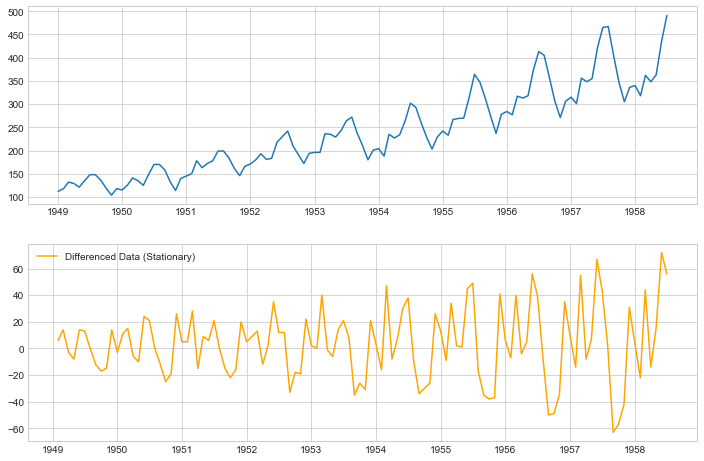

In [13]:
# differenced data plot

plt.figure(figsize = (12,8))
plt.subplot(211)
plt.plot(train_data['passengers'])
plt.subplot(212)
plt.plot(diff_train_data, 'orange') # first difference (t - (t-1))
plt.legend(['Differenced Data (Stationary)'])
plt.show()

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


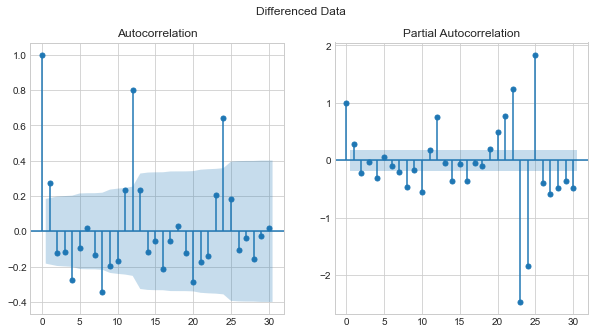

In [14]:
# ACF, PACF plot

fig, ax = plt.subplots(1,2, figsize = (10, 5))
fig.suptitle('Differenced Data')
sm.graphics.tsa.plot_acf(diff_train_data.values.squeeze(), lags = 30, ax = ax[0])
sm.graphics.tsa.plot_pacf(diff_train_data.values.squeeze(), lags = 30, ax = ax[1])
plt.show()

<img src="P02_ARMA_pq_선정기준.png">

- ACF는 싸인 곡선의 형태로 점차 감소한다고 보이고, PACF는 애매하지만 Lag 1 이후 절단면을 가지는 것으로 판단하여 AR(1) 모델을 선택함

### Estimate Parameters

In [15]:
# 참고 #
train_data.values

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [16]:
# ARIMA model fitting
# The (p, d, q) order of the model for the number of AR parameters, differences, and MA parameters to use.

model = ARIMA(train_data.values, order=(1,1,0))
model_fit = model.fit()
model_fit.summary()

# AIC 값은 1069.44이고, constant의 p-value 값이 유의미하지 않게 나왔다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  114
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -531.720
Method:                       css-mle   S.D. of innovations             25.659
Date:                Wed, 09 Dec 2020   AIC                           1069.440
Time:                        22:26:11   BIC                           1077.649
Sample:                             1   HQIC                          1072.771
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5124      3.329      1.055      0.291      -3.012      10.037
ar.L1.D.y      0.2803      0.091      3.077      0.002       0.102       0.459
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.5681           +0.0000j            3.5681            0.0000
-----------------------------------------------------------------------------
"""

### Diagnosis Check - ARIMA

In [17]:
# Parameter search

print('Examples of parameter combinations for Seasonal ARIMA...')
p = range(0,3)
d = range(1,2)
q = range(0,3)

Examples of parameter combinations for Seasonal ARIMA...


In [18]:
pdq = list(itertools.product(p, d, q))
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2)]

In [19]:
aic=[]
for i in pdq:
    model = ARIMA(train_data.values, order=(i))
    model_fit = model.fit()
    print(f'ARIMA: {i} >> AIC : {round(model_fit.aic, 2)}')
    aic.append(round(model_fit.aic,2))

ARIMA: (0, 1, 0) >> AIC : 1076.52
ARIMA: (0, 1, 1) >> AIC : 1064.62
ARIMA: (0, 1, 2) >> AIC : 1061.08
ARIMA: (1, 1, 0) >> AIC : 1069.44
ARIMA: (1, 1, 1) >> AIC : 1058.83
ARIMA: (1, 1, 2) >> AIC : 1046.05
ARIMA: (2, 1, 0) >> AIC : 1066.2
ARIMA: (2, 1, 1) >> AIC : 1045.66
ARIMA: (2, 1, 2) >> AIC : 1047.19


In [20]:
# Search optimal parameters

optimal = [(pdq[i], j) for i, j in enumerate(aic) if j == min(aic)]
optimal

[((2, 1, 1), 1045.66)]

In [21]:
# 위 최적 값으로 만든 모델 다시 Summary

model_opt = ARIMA(train_data.values, order = optimal[0][0])
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

# AIC score가 1045.66으로 임의의 모델보다 성능이 좋아졌고, p-value도 모두 유의미하게 나옴

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  114
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -517.830
Method:                       css-mle   S.D. of innovations             22.317
Date:                Wed, 09 Dec 2020   AIC                           1045.660
Time:                        22:26:12   BIC                           1059.341
Sample:                             1   HQIC                          1051.212
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5600      0.163     15.754      0.000       2.241       2.878
ar.L1.D.y      1.0890      0.085     12.816      0.000       0.922       1.256
ar.L2.D.y     -0.4730      0.086     -5.528      0.000      -0.641      -0.305
ma.L1.D.y     -0.9999      0.040    -25.219      0.000      -1.078      -0.922
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1512           -0.8882j            1.4540           -0.1046
AR.2            1.1512           +0.8882j            1.4540            0.1046
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

### Use Model to Forecast - ARIMA

In [22]:
prediction = model_opt_fit.forecast(len(test_data))
predicted_value = prediction[0]
predicted_ub = prediction[2][:,0]
predicted_lb = prediction[2][:,1]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

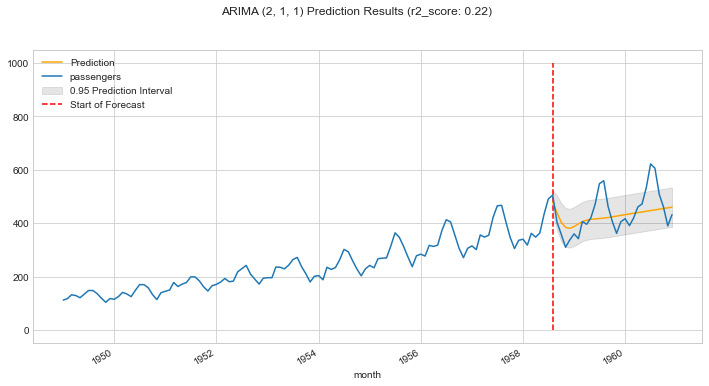

In [56]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(predict_index, predicted_value, color = 'orange', label = 'Prediction') # 예측값(위 vline 이후 구간에 표시됨)
ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label = '0.95 Prediction Interval')

data.plot(ax = ax);
ax.vlines('1958-08-01', 0, 1000, linestyle = '--', color = 'r', label = 'Start of Forecast') # x좌표를 날짜로 적음
ax.legend(loc='upper left')
plt.suptitle(f'ARIMA {optimal[0][0]} Prediction Results (r2_score: {round(r2,2)})')

plt.show()

# 빨간 점선 이후의 주황색 선이 예측값이며, 회색 구간이 95% interval 구간이다.
# 대체로 추세를 따라가나 피크 값을 완벽히 예측하기에는 다소 무리가 있는 것을 볼 수 있다.
# R2 score도 0.22 수준인 것을 확인할 수 있었다.

### (참고) Diagnosis Sheck - SARIMA
- SARIMA까지 해야하는 것인지는 모르겠음

In [58]:
print('Examples of parameter combinations for Seasonal ARIMA...')
p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12 # 계절성이 12개월마다 있다고 생각해서 12 입력. 얘도 위에 range로 탐색해도 됨
                ) for x in list(itertools.product(p, d, q))]
seasonal_pdq

Examples of parameter combinations for Seasonal ARIMA...


[(0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12)]

In [68]:
aic = []
params = []
for i in pdq:
    for j in seasonal_pdq:
        try:
            model = SARIMAX(train_data.values, order=(i), seasonal_order = (j))
            model_fit = model.fit()
            print(f'SARIMA: {i}{j} >> AIC : {round(model_fit.aic,2)}')
            aic.append(round(model_fit.aic,2))
            params.append((i, j))
        except:
            continue

SARIMA: (0, 1, 0)(0, 1, 0, 12) >> AIC : 757.83
SARIMA: (0, 1, 0)(0, 1, 1, 12) >> AIC : 756.99
SARIMA: (0, 1, 0)(0, 1, 2, 12) >> AIC : 758.83
SARIMA: (0, 1, 0)(1, 1, 0, 12) >> AIC : 756.96
SARIMA: (0, 1, 0)(1, 1, 1, 12) >> AIC : 758.92
SARIMA: (0, 1, 0)(1, 1, 2, 12) >> AIC : 754.42
SARIMA: (0, 1, 0)(2, 1, 0, 12) >> AIC : 758.87
SARIMA: (0, 1, 0)(2, 1, 1, 12) >> AIC : 760.73


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA: (0, 1, 0)(2, 1, 2, 12) >> AIC : 754.9
SARIMA: (0, 1, 1)(0, 1, 0, 12) >> AIC : 756.01
SARIMA: (0, 1, 1)(0, 1, 1, 12) >> AIC : 756.38
SARIMA: (0, 1, 1)(0, 1, 2, 12) >> AIC : 757.65
SARIMA: (0, 1, 1)(1, 1, 0, 12) >> AIC : 756.17
SARIMA: (0, 1, 1)(1, 1, 1, 12) >> AIC : 758.11


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA: (0, 1, 1)(1, 1, 2, 12) >> AIC : 751.73
SARIMA: (0, 1, 1)(2, 1, 0, 12) >> AIC : 757.99
SARIMA: (0, 1, 1)(2, 1, 1, 12) >> AIC : 753.78


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA: (0, 1, 1)(2, 1, 2, 12) >> AIC : 760.67
SARIMA: (0, 1, 2)(0, 1, 0, 12) >> AIC : 757.78
SARIMA: (0, 1, 2)(0, 1, 1, 12) >> AIC : 758.04
SARIMA: (0, 1, 2)(0, 1, 2, 12) >> AIC : 759.28
SARIMA: (0, 1, 2)(1, 1, 0, 12) >> AIC : 757.81
SARIMA: (0, 1, 2)(1, 1, 1, 12) >> AIC : 759.75
SARIMA: (0, 1, 2)(1, 1, 2, 12) >> AIC : 753.5
SARIMA: (0, 1, 2)(2, 1, 0, 12) >> AIC : 759.64
SARIMA: (0, 1, 2)(2, 1, 1, 12) >> AIC : 755.48


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA: (0, 1, 2)(2, 1, 2, 12) >> AIC : 763.81
SARIMA: (1, 1, 0)(0, 1, 0, 12) >> AIC : 755.5
SARIMA: (1, 1, 0)(0, 1, 1, 12) >> AIC : 755.98
SARIMA: (1, 1, 0)(0, 1, 2, 12) >> AIC : 757.1
SARIMA: (1, 1, 0)(1, 1, 0, 12) >> AIC : 755.75
SARIMA: (1, 1, 0)(1, 1, 1, 12) >> AIC : 757.65
SARIMA: (1, 1, 0)(1, 1, 2, 12) >> AIC : 751.15
SARIMA: (1, 1, 0)(2, 1, 0, 12) >> AIC : 757.45
SARIMA: (1, 1, 0)(2, 1, 1, 12) >> AIC : 752.99
SARIMA: (1, 1, 1)(0, 1, 0, 12) >> AIC : 756.02
SARIMA: (1, 1, 1)(0, 1, 1, 12) >> AIC : 756.63
SARIMA: (1, 1, 1)(0, 1, 2, 12) >> AIC : 757.75
SARIMA: (1, 1, 1)(1, 1, 0, 12) >> AIC : 756.41
SARIMA: (1, 1, 1)(1, 1, 1, 12) >> AIC : 758.26
SARIMA: (1, 1, 1)(1, 1, 2, 12) >> AIC : 752.53
SARIMA: (1, 1, 1)(2, 1, 0, 12) >> AIC : 758.03
SARIMA: (1, 1, 1)(2, 1, 1, 12) >> AIC : 754.17
SARIMA: (1, 1, 1)(2, 1, 2, 12) >> AIC : 760.24
SARIMA: (1, 1, 2)(0, 1, 0, 12) >> AIC : 757.92
SARIMA: (1, 1, 2)(0, 1, 1, 12) >> AIC : 758.44
SARIMA: (1, 1, 2)(0, 1, 2, 12) >> AIC : 759.63
SARIMA: (1, 1, 

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA: (1, 1, 2)(2, 1, 1, 12) >> AIC : 756.16


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA: (1, 1, 2)(2, 1, 2, 12) >> AIC : 762.45
SARIMA: (2, 1, 0)(0, 1, 0, 12) >> AIC : 756.77
SARIMA: (2, 1, 0)(0, 1, 1, 12) >> AIC : 757.23
SARIMA: (2, 1, 0)(0, 1, 2, 12) >> AIC : 758.31
SARIMA: (2, 1, 0)(1, 1, 0, 12) >> AIC : 756.98
SARIMA: (2, 1, 0)(1, 1, 1, 12) >> AIC : 758.86
SARIMA: (2, 1, 0)(1, 1, 2, 12) >> AIC : 752.77
SARIMA: (2, 1, 0)(2, 1, 0, 12) >> AIC : 758.65
SARIMA: (2, 1, 0)(2, 1, 1, 12) >> AIC : 754.51


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA: (2, 1, 0)(2, 1, 2, 12) >> AIC : 760.94
SARIMA: (2, 1, 1)(0, 1, 0, 12) >> AIC : 757.98


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA: (2, 1, 1)(0, 1, 1, 12) >> AIC : 758.54
SARIMA: (2, 1, 1)(0, 1, 2, 12) >> AIC : 759.69
SARIMA: (2, 1, 1)(1, 1, 0, 12) >> AIC : 758.31
SARIMA: (2, 1, 1)(1, 1, 1, 12) >> AIC : 760.18


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA: (2, 1, 1)(1, 1, 2, 12) >> AIC : 754.53
SARIMA: (2, 1, 1)(2, 1, 0, 12) >> AIC : 759.98


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA: (2, 1, 1)(2, 1, 1, 12) >> AIC : 756.16


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA: (2, 1, 1)(2, 1, 2, 12) >> AIC : 762.2
SARIMA: (2, 1, 2)(0, 1, 0, 12) >> AIC : 755.2
SARIMA: (2, 1, 2)(0, 1, 1, 12) >> AIC : 755.99
SARIMA: (2, 1, 2)(0, 1, 2, 12) >> AIC : 759.77
SARIMA: (2, 1, 2)(1, 1, 0, 12) >> AIC : 755.82
SARIMA: (2, 1, 2)(1, 1, 1, 12) >> AIC : 757.71
SARIMA: (2, 1, 2)(1, 1, 2, 12) >> AIC : 752.34
SARIMA: (2, 1, 2)(2, 1, 0, 12) >> AIC : 757.56


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA: (2, 1, 2)(2, 1, 1, 12) >> AIC : 753.95
SARIMA: (2, 1, 2)(2, 1, 2, 12) >> AIC : 760.17


In [69]:
# Search optimal parameters

optimal = [(params[i], j) for i, j in enumerate(aic) if j == min(aic)]
optimal

# small pdq는 (1,1,0), large pdq는 (1,1,2) 그리고 Seasonal parameter는 12인 것을 볼 수 있다.

[(((1, 1, 0), (1, 1, 2, 12)), 751.15)]

In [70]:
model_opt = SARIMAX(train_data.values, order=optimal[0][0][0], seasonal_order = optimal[0][0][1])
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

# ARIMA보다 SARIMA가 AIC가 훨씬 낮은 것을 볼 수 있다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood                -370.575
Date:                                 Wed, 02 Dec 2020   AIC                            751.150
Time:                                         23:07:23   BIC                            764.274
Sample:                                              0   HQIC                           756.464
                                                 - 115                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2362      0.093     -2.541      0.011      -0.418      -0.054
ar.S.L12       0.9981      0.192      5.208      0.000       0.622       1.374
ma.S.L12      -1.3630      2.095     -0.651      0.515      -5.470       2.744
ma.S.L24       0.3914      0.731      0.536      0.592      -1.041       1.823
sigma2        70.2975    134.586      0.522      0.601    -193.487     334.082
===================================================================================
Ljung-Box (Q):                       39.85   Jarque-Bera (JB):                 2.76
Prob(Q):                              0.48   Prob(JB):                         0.25
Heteroskedasticity (H):               1.09   Skew:                             0.38
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Use Model to Forecast - SARIMA

In [72]:
prediction = model_opt_fit.get_forecast(len(test_data))
predicted_value = prediction.predicted_mean
predicted_ub = prediction.conf_int()[:,0]
predicted_lb = prediction.conf_int()[:,1]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

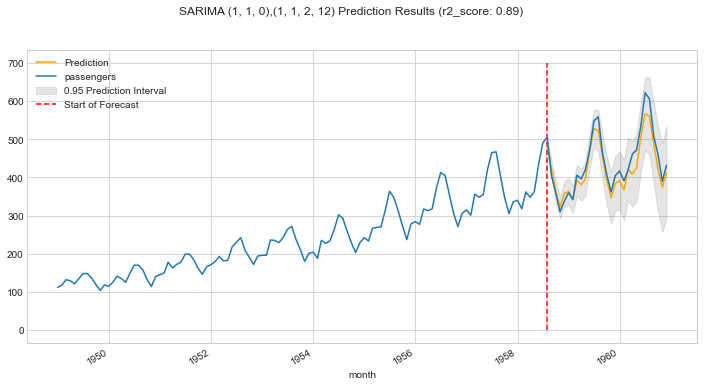

In [74]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(predict_index, predicted_value, color = 'orange', label = 'Prediction') # 예측값(위 vline 이후 구간에 표시됨)
ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label = '0.95 Prediction Interval')

data.plot(ax = ax);
ax.vlines('1958-08-01', 0, 700, linestyle = '--', color = 'r', label = 'Start of Forecast') # x좌표를 날짜로 적음
ax.legend(loc='upper left')
plt.suptitle(f'SARIMA {optimal[0][0][0]},{optimal[0][0][1]} Prediction Results (r2_score: {round(r2,2)})')

plt.show()

# 예측 값의 추세가 실제 값을 상당히 잘 따라가고 있으며,
# r2 score가 0.89로 훨씬 더 성능이 향상됨
# 계절성을 반영한 것이 예측 성능을 향상시키는데 기여를 했다고 볼 수 있다.

### Diagnosis Check - auto_arima (ADP에서는 패키지 없을 듯)

In [75]:
# Parameters search

auto_arima_model = auto_arima(train_data, start_p=1, start_q=1, # p, q 시작값
                             max_p=3, max_q=3, # p, q 최대값
                             m=12, seasonal=True, # 계절성 있는지와 구간(True = SARIMA) / 계절성 없다고 생각되면 m빼고, False
                             d=1, D=1, # 차분 최소, 최대
                             max_P=3, max_Q=3, # P, Q 최대  ## start_P, start_Q의 default 값은 1이라 생략했음
                             trace=True,  # 각 결과값은 print 해줌
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=757.826, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=756.988, Time=0.14 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=758.826, Time=0.65 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=758.186, Time=0.95 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=756.959, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=758.922, Time=0.22 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=754.423, Time=1.51 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=754.685, Time=2.87 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=758.869, Time=0.21 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=760.726, Time=1.06 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=754.903, Time=2.88 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=756.686, Time=4.51 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=759.643, Time=0.72 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=755.899, Time=4.26 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=756.688, Time=5.36 sec
 ARIMA(0,1

In [76]:
auto_arima_model.summary()
# AIC가 751

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood                -370.575
Date:                                 Wed, 02 Dec 2020   AIC                            751.150
Time:                                         23:14:54   BIC                            764.274
Sample:                                              0   HQIC                           756.464
                                                 - 115                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2362      0.093     -2.541      0.011      -0.418      -0.054
ar.S.L12       0.9981      0.192      5.208      0.000       0.622       1.374
ma.S.L12      -1.3630      2.095     -0.651      0.515      -5.470       2.744
ma.S.L24       0.3914      0.731      0.536      0.592      -1.041       1.823
sigma2        70.2975    134.586      0.522      0.601    -193.487     334.082
===================================================================================
Ljung-Box (Q):                       39.85   Jarque-Bera (JB):                 2.76
Prob(Q):                              0.48   Prob(JB):                         0.25
Heteroskedasticity (H):               1.09   Skew:                             0.38
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
prediction = auto_arima_model.predict(len(test_data), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

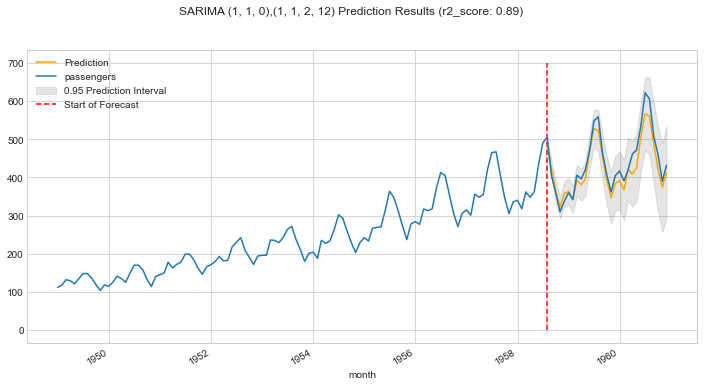

In [78]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(predict_index, predicted_value, color = 'orange', label = 'Prediction') # 예측값(위 vline 이후 구간에 표시됨)
ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label = '0.95 Prediction Interval')

data.plot(ax = ax);
ax.vlines('1958-08-01', 0, 700, linestyle = '--', color = 'r', label = 'Start of Forecast') # x좌표를 날짜로 적음
ax.legend(loc='upper left')
plt.suptitle(f'SARIMA {optimal[0][0][0]},{optimal[0][0][1]} Prediction Results (r2_score: {round(r2,2)})')

plt.show()

# 예측 값의 추세가 실제 값을 상당히 잘 따라가고 있으며,
# r2 score가 0.89로 훨씬 더 성능이 향상됨
# 계절성을 반영한 것이 예측 성능을 향상시키는데 기여를 했다고 볼 수 있다.

# 07_기계학습_1

## 다중 분류 모델 성능평가

In [4]:
# 다중 분류 모델 성능 평가

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true = [0, 0, 0, 1, 1, 2, 2, 2]
y_pred = [0, 0, 2, 1, 2, 2, 2, 1]
print(confusion_matrix( y_true, y_pred))
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

[[2 0 1]
 [0 1 1]
 [0 1 2]]
              precision    recall  f1-score   support

     class 0       1.00      0.67      0.80         3
     class 1       0.50      0.50      0.50         2
     class 2       0.50      0.67      0.57         3

    accuracy                           0.62         8
   macro avg       0.67      0.61      0.62         8
weighted avg       0.69      0.62      0.64         8



- 해석 : confusion matrics는 세로축이 실제값(y_true), 가로축이 예측값(y_pred)
- 해석 : class 0의 precision은 1.00, recall 0.67, f1-score 0.80임
- 해석 : 분류결과의 accuracy는 0.62, 전체의 단순평균 precision은 0.67, recall 0.61, f1-score 0.62임

- macro avg: 단순평균
- weighted avg: 각 클래스에 속하는 표본의 갯수로 가중평균

## ROC 및 AUC (다중분류는 이어서 나옴)

- ROC Curve
- x축 : 허위 양성 비율(FPR) = FP/(FP+TN)
- y축 : 참 양성 비율(TPR) = TP/(FP+FN)

In [ ]:
model = LogisticRegression().fit(X, y)   # X, y를 fit하여 모델링
y_hat = model.predict(X)   # 예측값 생성(y_hat) 

from sklearn.metrics import roc_curve

# 방법 1
fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))

# 방법 2 : decision_function 메서드를 제공하지 않는 모형은 predict_proba 명령을 써서 확률을 입력해도 된다.
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])

# AUC : AUC가 1에 가까운 값이고 좋은 모형이다.
from sklearn.metrics import auc
auc(fpr1, tpr1)

# 시각화 : 모델 두 개일 때
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X)) # 모델 1
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X)) # 모델 2

plt.plot(fpr, tpr, 'o-', label="Logistic Regression") # 모델 1
plt.plot([0, 1], [0, 1], 'k--', label="random guess") # 모델 2
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

- MultiClass Classification
- 다중 분류 문제에서는 One-versus-Rest(OvR) 문제로 가정하고 (사람, 개, 고양이를 분류하는 문제일 경우에는 사람 vs 나머지, 개 vs 나머지, 고양이 vs 나머지) 각 클래스마다 하나씩 ROC커브를 그립니다.

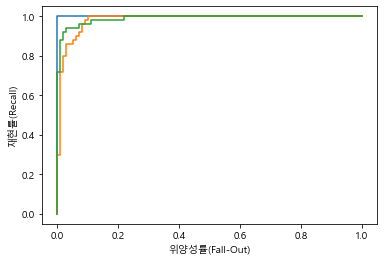

ROC_AUC :  [1.0, 0.9818, 0.989]


In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data   # 독립변수가 있고


# 이 아래부터 활용하면 됨
y = label_binarize(iris.target, classes = [0, 1, 2])   # 종속변수 y를 더미화를 시킴

fpr = [None] * 3   # class 개수만큼(여기선 3개)
tpr = [None] * 3
threshold = [None] * 3
roc_auc = []

for i in range(3):   # range 클래스 개수만큼
    model = GaussianNB().fit(X, y[:, i])   # 모델링을 함
    fpr[i], tpr[i], threshold[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])
    
    roc_auc.append(auc(fpr[i], tpr[i]))

plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.show()
print('ROC_AUC : ',roc_auc)

## StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# 스케일링 4단계
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
# 스케일링 전으로 되돌리기
scaler.inverse_transform(X_test_scale)

# 단계적 선택법 (ADP 실기 책 p.198 참고 -  R 코드임)


In [ ]:
data = read.csv(file = 'ToyotaCorolla.csv', header=T)
data

lm_a <- lm(Price ~ ., data = data)
summary(lm_a)

result <- step(lm_a, direction="both")
result
